# Imports

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# ------------------------------------------
# desabilita warnings
# ------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ------------------------------------------
# bibliotecas principais
# ------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Features / Target


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/df-oficial.csv')

df = df.drop(columns = ['Unnamed: 0'])

df.info()

In [9]:
x = df.drop(columns="IS_ACTIVE") # features
y = df["IS_ACTIVE"] # target

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# instaciando o objeto scaler
scaler = MinMaxScaler()

# fit + transform no conjunto de treino
# utiliza apenas o transform : fit exclusivo no conjunto de treino
x_train[list(x_train.columns)] = scaler.fit_transform(x_train[list(x_train.columns)])

# scaler no conjunto de teste
x_test[list(x_test.columns)] = scaler.transform(x_test[list(x_test.columns)])

In [12]:
y_train.squeeze()

19778     2
96599     2
58231     2
11258     2
67121     2
         ..
73349     2
109259    2
50057     2
5192      1
128037    2
Name: IS_ACTIVE, Length: 110229, dtype: int64

In [13]:
y_true = y_test

# Seção Modelos

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Instaciação do obj Algoritmo
adaboost = AdaBoostClassifier()
# Treino # x = Features, y = Label/Target
adaboost.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series

In [ ]:
print('Acuracidade (treino): ', adaboost.score( x_train, y_train ))
print('Acuracidade (teste): ', adaboost.score( x_test, y_test ))

In [ ]:
y_pred_adaboost = adaboost.predict(x_test)

In [ ]:
cm_adaboost = confusion_matrix(y_true, y_pred_adaboost, normalize = 'true')
cm_adaboost

In [ ]:
# versão visual mais bonita da matriz
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, 
                              display_labels=adaboost.classes_)

disp_adaboost.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_adaboost))

### Alteração nos parâmetros do modelo AdaBoost - Hiperparametrização do Modelo 

In [ ]:
# Nesta célula, utilizaremos os o modelo testado anteriormente para descobrir quais seriam os,
# melhores parâmetros para ele. Com o resultado do GridSearch aplicado, iremos rodar o modelo
# novamente, só que com os hiperparâmetros desta vez.

# adaboost é o modelo que foi treinado anteriormente, ele é armazenado na variável model para que
# possamos utilizar o método GridSearch
tuning_adaboost = adaboost

# Cria o GridSearchCV
adaboost_parameters_gs = {'n_estimators': [10, 30, 60, 80],
              'algorithm': ['SAMME', 'SAMME.R']}

modelAdaBoost_tuned = GridSearchCV(tuning_adaboost, adaboost_parameters_gs)

# Treina os modelos e guarda na variável modelRanForest_tuned o melhor modelo
modelAdaBoost_tuned.fit(x_train, y_train)
modelAdaBoost_tuned.best_params_

In [ ]:
print('Acuracidade (treino): ', modelAdaBoost_tuned.score( x_train, y_train ))
print('Acuracidade (teste): ', modelAdaBoost_tuned.score( x_test, y_test ))

In [ ]:
# Criando o modelo com hyperparâmetros
BestModel_AdaBoost = AdaBoostClassifier(n_estimators = 80,
                                                    algorithm = 'SAMME.R')

BestModel_AdaBoost.fit(x_train, y_train)

In [ ]:
y_pred_BestModel_AdaBoost = BestModel_AdaBoost.predict(x_test)
cm_BestModel_AdaBoost = confusion_matrix(y_true, y_pred_BestModel_AdaBoost, normalize = 'true')

modelAdaBoost_tuned = confusion_matrix(y_true, y_pred_BestModel_AdaBoost, normalize = 'true')
cm_BestModel_AdaBoost

In [ ]:
# versão visual da matriz
disp_BestModel_Ranforest = ConfusionMatrixDisplay(confusion_matrix=cm_BestModel_RanForest, 
                            display_labels=BestModel_RanForest.classes_)

disp_BestModel_RanForest.plot()
plt.show()

In [ ]:
print('Acuracidade (treino): ', BestModel_AdaBoost.score( x_train, y_train ))
print('Acuracidade (teste): ', BestModel_AdaBoost.score( x_test, y_test ))

In [ ]:
print(classification_report(y_test, y_pred_BestModel_AdaBoost))

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Instaciação do obj Algoritmo
ranfor = RandomForestClassifier()
# Treino # x = Features, y = Label/Target
ranfor.fit( x_train, y_train ) # squeeze() -> df para series

RandomForestClassifier()

In [ ]:
print('Acuracidade (treino): ', ranfor.score( x_train, y_train ))
print('Acuracidade (teste): ', ranfor.score( x_test, y_test ))

Acuracidade (treino):  0.9999909279772111
Acuracidade (teste):  0.8557608856713448


In [ ]:
y_pred_ranfor = ranfor.predict(x_test)

In [ ]:
cm_ranfor = confusion_matrix(y_true, y_pred_ranfor, normalize = 'true')
cm_ranfor

array([[9.92496589e-01, 1.70532060e-03, 5.79809004e-03],
       [1.76195930e-04, 5.33873668e-01, 4.65950137e-01],
       [0.00000000e+00, 4.93239193e-02, 9.50676081e-01]])

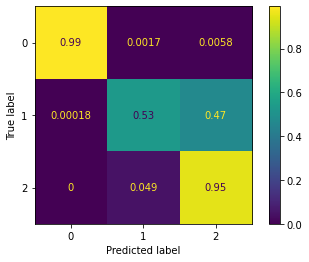

In [ ]:
# versão visual mais bonita da matriz
disp_ranfor = ConfusionMatrixDisplay(confusion_matrix=cm_ranfor, 
                              display_labels=ranfor.classes_)

disp_ranfor.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_ranfor))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5864
           1       0.80      0.53      0.64     11351
           2       0.84      0.95      0.89     30026

    accuracy                           0.86     47241
   macro avg       0.88      0.83      0.84     47241
weighted avg       0.85      0.86      0.85     47241



### Alteração nos parâmetros do modelo Random Forest - Hiperparametrização do Modelo 

In [ ]:
# Nesta célula, utilizaremos os o modelo testado anteriormente para descobrir quais seriam os,
# melhores parâmetros para ele. Com o resultado do GridSearch aplicado, iremos rodar o modelo
# novamente, só que com os hiperparâmetros desta vez.

# ranfor é o modelo que foi treinado anteriormente, ele é armazenado na variável model para que
# possamos utilizar o método GridSearch
tuning_ranforest = ranfor

# Cria o GridSearchCV
rf_parameters_gs = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [6, 8],
              'class_weight': ['balanced', 'balanced_subsample'],
              'min_samples_leaf': [2, 4]}

modelRanForest_tuned = GridSearchCV(tuning_ranforest, rf_parameters_gs)

# Treina os modelos e guarda na variável modelRanForest_tuned o melhor modelo
modelRanForest_tuned.fit(x_train, y_train)
modelRanForest_tuned.best_params_

In [ ]:
print('Acuracidade (treino): ', modelRanForest_tuned.score( x_train, y_train ))
print('Acuracidade (teste): ', modelRanForest_tuned.score( x_test, y_test ))

In [ ]:
# Criando o modelo com hyperparâmetros
BestModel_RanForest = RandomForestClassifier(class_weight = 'balanced_subsample',
                                                    max_depth = 8, min_samples_leaf = 2)

BestModel_RanForest.fit(x_train, y_train)

In [ ]:
y_pred_BestModel_RanForest = BestModel_RanForest.predict(x_test)
cm_BestModel_RanForest = confusion_matrix(y_true, y_pred_BestModel_RanForest, normalize = 'true')

modelRanForest_tuned = confusion_matrix(y_true, y_pred_BestModel_RanForest, normalize = 'true')
cm_BestModel_RanForest

In [ ]:
# versão visual da matriz
disp_BestModel_Ranforest = ConfusionMatrixDisplay(confusion_matrix=cm_BestModel_RanForest, 
                            display_labels=BestModel_RanForest.classes_)

disp_BestModel_RanForest.plot()
plt.show()

In [ ]:
print('Acuracidade (treino): ', BestModel_RanForest.score( x_train, y_train ))
print('Acuracidade (teste): ', BestModel_RanForest.score( x_test, y_test ))

In [ ]:
print(classification_report(y_test, y_pred_BestModel_RanForest))

## LGBM

In [16]:
import lightgbm as lgb

# Criando o modelo

lgb = LGBMClassifier()

lgb.fit(x_train, y_train)


LGBMClassifier()

In [17]:
print('Acuracidade (treino): ', lgb.score( x_train, y_train ))
print('Acuracidade (teste): ', lgb.score( x_test, y_test ))

Acuracidade (treino):  0.8724201435194006
Acuracidade (teste):  0.8654981901314536


In [18]:
y_pred_lgb = lgb.predict(x_test)

In [19]:
cm_lgb = confusion_matrix(y_true, y_pred_lgb, normalize = 'true')
cm_lgb

array([[0.12141883, 0.18656207, 0.6920191 ],
       [0.11769888, 0.18923443, 0.69306669],
       [0.12116166, 0.18487311, 0.69396523]])

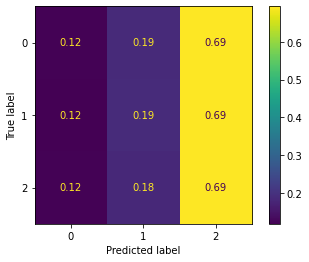

In [20]:
# versão visual mais bonita da matriz
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, 
                                  display_labels=model.classes_)

disp_lgb.plot()
plt.show()

In [21]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5710
           1       0.79      0.61      0.69     11439
           2       0.86      0.94      0.90     30092

    accuracy                           0.87     47241
   macro avg       0.88      0.85      0.86     47241
weighted avg       0.86      0.87      0.86     47241



### Alteração nos parâmetros do modelo LGBM - Hiperparametrização do Modelo

In [ ]:
# Nesta célula, utilizaremos os o modelo testado anteriormente para descobrir quais seriam os,
# melhores parâmetros para ele. Com o resultado do GridSearch aplicado, iremos rodar o modelo
# novamente, só que com os hiperparâmetros desta vez.

# lgb é o modelo que foi treinado anteriormente, ele é armazenado na variável model para que
# possamos utilizar o método GridSearch
tuning_lgb = lgb 

# Cria o GridSearchCV
lgbm_parameters_gs = {
    'boosting_type':['gbdt','dart','goss','rf'], 
    'num_leaves':[42,31],
    'max_depth':range(-3,0),
    'n_estimators':[80,100,200,120]
    }
modelLGBM_tuned = GridSearchCV(tuning_lgb, lgbm_parameters_gs)

# Treina os modelos e guarda na variável modelGS o melhor modelo
modelLGBM_tuned.fit(x_train, y_train)
modelLGBM_tuned.best_params_

In [ ]:
print('Acuracidade (treino): ', modelLGBM_tuned.score( x_train, y_train ))
print('Acuracidade (teste): ', modelLGBM_tuned.score( x_test, y_test ))

In [22]:
# Criando o modelo com hyperparâmetros
BestModel_LGBM = LGBMClassifier(objective='multiclass',num_leaves=42,max_depth=-3,n_estimators=200)

BestModel_LGBM.fit(x_train, y_train)

LGBMClassifier(max_depth=-3, n_estimators=200, num_leaves=42,
               objective='multiclass')

In [23]:
y_pred_BestModel_LGBM = BestModel_LGBM.predict(x_test)
cm_BestModel_LGBM = confusion_matrix(y_true, y_pred_BestModel_LGBM, normalize = 'true')

modelLGBM_tuned = confusion_matrix(y_true, y_pred_BestModel_LGBM, normalize = 'true')
cm_BestModel_LGBM

array([[0.12141883, 0.19218963, 0.68639154],
       [0.11769888, 0.19275835, 0.68954277],
       [0.12112836, 0.19043496, 0.68843669]])

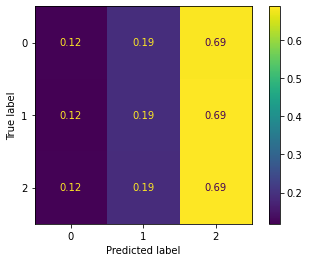

In [24]:
# versão visual da matriz
disp_BestModel_LGBM = ConfusionMatrixDisplay(confusion_matrix=cm_BestModel_LGBM, 
                            display_labels=BestModel_LGBM.classes_)

disp_BestModel_LGBM.plot()
plt.show()

In [25]:
print('Acuracidade (treino): ', BestModel_LGBM.score( x_train, y_train ))
print('Acuracidade (teste): ', BestModel_LGBM.score( x_test, y_test ))

Acuracidade (treino):  0.8857106569051701
Acuracidade (teste):  0.8689697508520141


In [ ]:
print(classification_report(y_test, y_pred_BestModel_LGBM))

# Seção de Balanceamento e Reavaliação dos Modelos

Nesta seção será utilizado um método de redoção amostral com base na classe majoritária (Undersampling), com o qual pretende-se obter um melhor resultado de revocação para os modelos considerados.

## Balanceamento dos dados - Método UnderSampling

In [26]:
# Redução da classe de maior prevalecência no target 
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=13)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [27]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_resampled, y_resampled, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [28]:
# Instaciando o objeto scaler
scaler1 = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train1[list(x_train1.columns)] = scaler1.fit_transform(x_train1[list(x_train1.columns)])

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,]
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test1[list(x_test1.columns)] = scaler1.transform(x_test1[list(x_test1.columns)])

In [29]:
y_train1.squeeze()

46267     2
141493    0
126779    2
146212    0
62926     2
         ..
141448    0
62426     1
149489    0
25940     1
70083     2
Name: IS_ACTIVE, Length: 110229, dtype: int64

In [30]:
y_true1 = y_test1

### Adaboost



In [ ]:
BestModel_AdaBoost.fit( x_train1, y_train1.squeeze() ) # squeeze() -> df para series

In [ ]:
print('Acuracidade (treino): ', BestModel_AdaBoost.score( x_train1, y_train1 ))
print('Acuracidade (teste): ', BestModel_AdaBoost.score( x_test1, y_test1 ))

In [ ]:
y_pred_BestModel_AdaBoost1 = BestModel_AdaBoost.predict(x_test1)

In [ ]:
cm_BestModel_AdaBoost1 = confusion_matrix(y_true1, y_pred_BestModel_AdaBoost1, normalize = 'true')

cm_BestModel_AdaBoost1

In [ ]:
# versão visual mais bonita da matriz
disp_BestModel_AdaBoost1 = ConfusionMatrixDisplay(confusion_matrix=cm_BestModel_AdaBoost1, 
                              display_labels=BestModel_AdaBoost.classes_)

disp_BestModel_AdaBoost1.plot()
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_BestModel_AdaBoost1 ))

### Random Forest


In [ ]:
BestModel_RanForest.fit( x_train1, y_train1 ) # squeeze() -> df para series

In [ ]:
print('Acuracidade (treino): ', BestModel_RanForest.score( x_train1, y_train1 ))
print('Acuracidade (teste): ', BestModel_RanForest.score( x_test1, y_test1 ))

In [ ]:
y_pred_BestModel_RanForest1 = BestModel_RanForest.predict(x_test1)

In [ ]:
cm_BestModel_RanForest1 = confusion_matrix(y_true1, y_pred_BestModel_RanForest1, normalize = 'true')
cm_BestModel_RanForest1

In [ ]:
# versão visual mais bonita da matriz
disp_BestModel_RanForest1 = ConfusionMatrixDisplay(confusion_matrix=cm_BestModel_RanForest1, 
                             display_labels=BestModel_RanForest.classes_)

disp_BestModel_RanForest1.plot()
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_BestModel_RanForest1))

### LGB

In [32]:
BestModel_LGBM.fit(x_train1, y_train1)

LGBMClassifier(max_depth=-3, n_estimators=200, num_leaves=42,
               objective='multiclass')

In [33]:
print('Acuracidade (treino): ', BestModel_LGBM.score( x_train1, y_train1 ))
print('Acuracidade (teste): ', BestModel_LGBM.score( x_test1, y_test1 ))

Acuracidade (treino):  0.8867448675031072
Acuracidade (teste):  0.8694142799686713


In [34]:
y_pred_BestModel_LGBM1 = BestModel_LGBM.predict(x_test1) 

In [35]:
cm_BestModel_LGBM1 = confusion_matrix(y_true1, y_pred_BestModel_LGBM1, normalize = 'true')

cm_BestModel_LGBM1

array([[9.92317094e-01, 2.26994936e-03, 5.41295617e-03],
       [1.75916967e-04, 6.23537690e-01, 3.76286393e-01],
       [1.99037983e-04, 6.10051418e-02, 9.38795820e-01]])

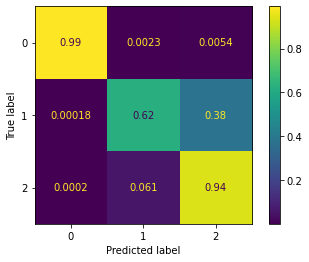

In [36]:
# versão visual mais bonita da matriz
disp_BestModel_LGBM1 = ConfusionMatrixDisplay(confusion_matrix=cm_BestModel_LGBM1, 
                              display_labels=BestModel.classes_)

disp_BestModel_LGBM1.plot()
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_BestModel_LGBM1))